In [7]:
import matplotlib.pyplot as plt
# Read and plot the new points in the same graph
with open('input.txt', 'r') as input_f:
    with open('output1.txt', 'r') as output_f:
        num_testcases = int(input_f.readline())
        num_test_cases = int(output_f.readline())

        for _ in range(num_testcases):
            min_x = float('inf')
            max_x = float('-inf')
            
            num_points = int(input_f.readline())
            partition_cost = float(input_f.readline())

            points = []
            for i in range(num_points):
                x, y = map(float, input_f.readline().split())
                plt.plot(x, y, 'ro')
                points.append((x, y))
                max_x = max(max_x, x)
                min_x = min(min_x, x)

            partition_cost = float(output_f.readline())
            num_segments = int(output_f.readline())

            segments = []
            for i in range(num_segments):
                slope, intercept = map(float, output_f.readline().split())
                segments.append((slope, intercept))

            segments.reverse()

            for i, segment in enumerate(segments):
                min_y = segment[0] * min_x + segment[1]
                max_y = segment[0] * max_x + segment[1]

                plt.plot([min_x, max_x], [min_y, max_y])

            
            plt.title('Segment and Point Visualization')
            plt.xlabel('X')
            plt.ylabel('Y')  
            plt.legend()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


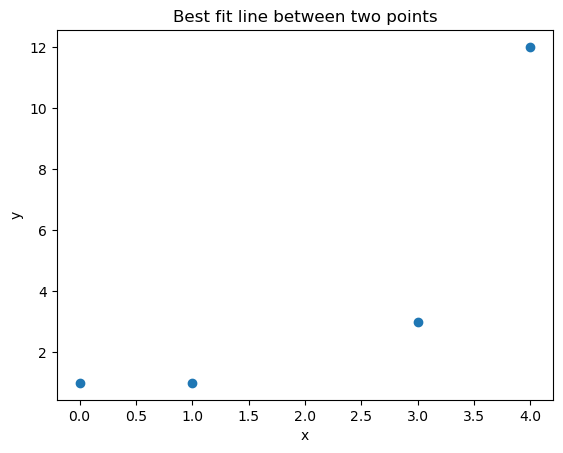

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

x_values_input = []
y_values_input = []

hashmap = {}
key = (-1, -1)
value = -1
hashmap[key] = value
i = 0
with open('input.txt', 'r') as file:
    # skip the first line (header)
    file.readline()
    file.readline()
    # iterate over each line in the file
    for line in file:
        # split the line into two values using whitespace as the separator
        x, y = line.strip().split(' ')
        # append the values to the respective lists as floats
        x_values_input.append(float(x))
        y_values_input.append(float(y))
        hashmap[(x,y)]=i
        i = i+1


plt.plot(x_values_input, y_values_input, 'o')

x_values = []
y_values = []

# open the file in read mode
with open('output1.txt', 'r') as file:
    # iterate over each line in the file
    for line in file:
        # split the line into two values using comma as the separator
        x_values.append(float(x))
        y_values.append(float(y))

i=-1

while i != len(x_values) :
    i=i+1
    x_values1 = []
    y_values1 = []
    if i == 0:
        continue
    else:
        # create empty lists to store x and y values
        x_values1.append(x_values[i-1]);
        y_values1.append(y_values[i-1]);
        x_values1.append(x_values[i]);
        y_values1.append(y_values[i]);
        
        i = i+1
    

    # Fit a linear regression model to the data
    m, b = np.polyfit(x_values1, y_values1, 1)

    # Generate x values that cover the range of the two points
    x_range = np.linspace(min(x_values1), max(x_values1), 100)

    # Calculate y values using the slope and intercept from the model
    y_range = m * x_range + b

    # Plot the data points and best fit line
    # plt.plot(x_values1, x_values1, 'o')
    plt.plot(x_range, y_range)

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Best fit line between two points')
# Show the plot
plt.show()
